# ARIMA_RO

> *by Popescu Ionut-Alexandru*

# Citirea si pregatirea datelor

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import stdev
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Citirea datelor
cases_per_day = pd.read_csv('cases_per_day.csv')
df_cumulat = pd.read_csv('F:\\Python\\Covid-19-Romania\\Covid-19-Romania\\Datasets\\MAI Data\\train.csv')
display(cases_per_day.head(5))
display(df_cumulat.head(5))

,Date,NumberOfCases,NumberOfFatalities,Weekday
0,2020-02-26,1,0,Wednesday
1,2020-02-27,0,0,Thursday
2,2020-02-28,2,0,Friday
3,2020-02-29,0,0,Saturday
4,2020-03-01,0,0,Sunday


,Date,Fatalities,Recovered,Quarantined,Isolated,Tested,ATI,ConfirmedCases
0,2/26/2020,0,0,26,2077,32,0,1
1,2/27/2020,0,0,99,7174,18,0,1
2,2/28/2020,0,0,42,8356,30,0,3
3,2/29/2020,0,0,52,8796,381,0,3
4,3/1/2020,0,0,52,8085,393,0,3


In [47]:
#Transformarea datei din string in date
cases_per_day.index = pd.to_datetime(cases_per_day['Date'])
cases_per_day = cases_per_day.drop('Date',axis=1)
df_cumulat.index = pd.to_datetime(df_cumulat['Date'])
df_cumulat = df_cumulat.drop('Date',axis=1)

# Vizualizarea datelor

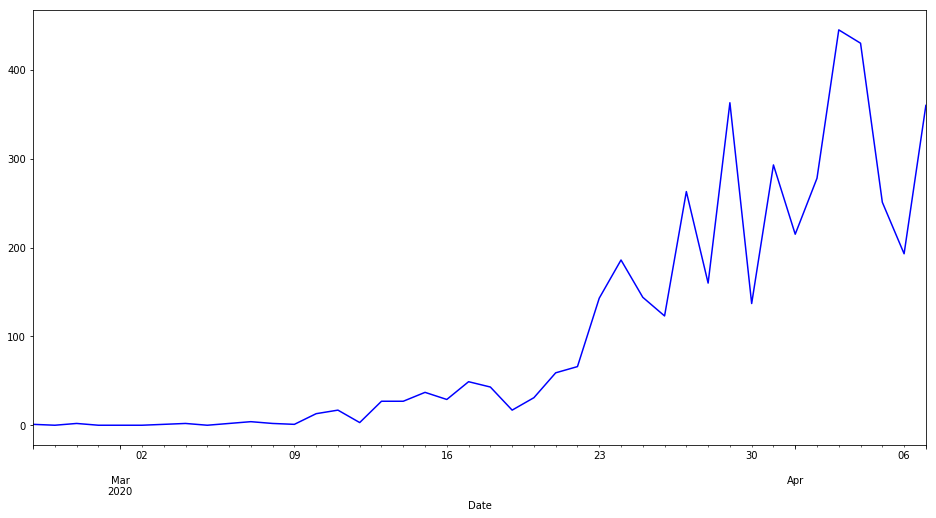

In [48]:
#Vizualizarea numarului de cazuri confirmate
f,ax = plt.subplots(figsize=(16,8))
cases_per_day['NumberOfCases'].plot(ax=ax,color='blue')

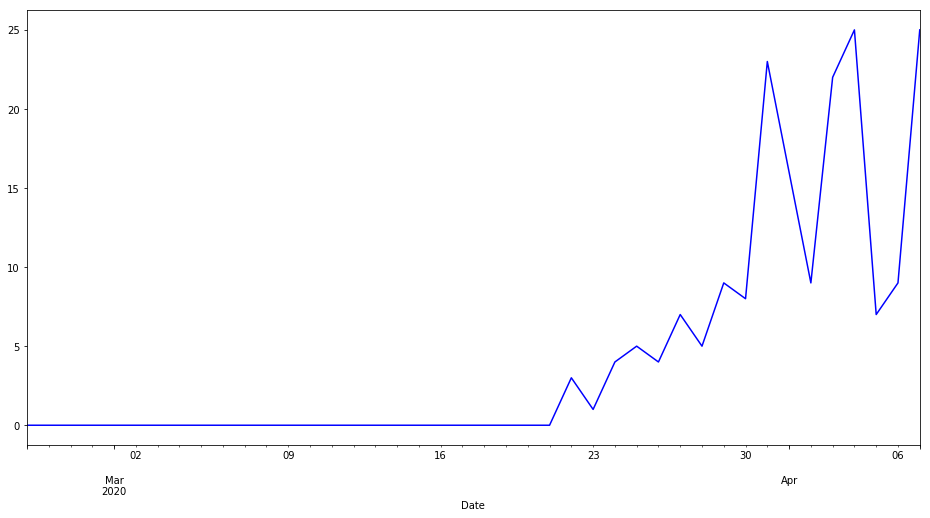

In [49]:
#Vizualizarea numarului de decese
f,ax = plt.subplots(figsize=(16,8))
cases_per_day['NumberOfFatalities'].plot(ax=ax,color='blue')

# Testarea stationaritatii pentru diferite seturi de date (logaritmate, diferentiate)

In [50]:
#Realizarea functiei de testare a stationaritatii
from statsmodels.tsa.stattools import adfuller, kpss
def testare_stationaritate(dataset,ts,alpha = 0.05):
    
    print("Testare folosind testul ADF:\n")
    print()
    #Testarea stationaritatii folosind testul Augmented Dickey–Fuller
    test_adf = adfuller(dataset[ts],autolag="AIC")
    p_value = test_adf[1]
    print("Seria de timp este stationara dupa testarea ADF?:\n")
    if p_value<alpha:
        print("Conform testului ADF seria de timp este stationara!\n")
    else:
        print("Conform testului ADF seria de timp nu este stationara!\n")
    
    adf_output = pd.Series(test_adf[0:4],
                        index=['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    
    for key, value in test_adf[4].items():
        adf_output[f'Critical Value {key}'] = value 
    
    print(adf_output)
    print()
    print("Testare folosind testul KPSS:\n")
    print()
    #Testarea stationaritatii folosind testul Kwiatkowski–Phillips–Schmidt–Shin 
    test_kpss = kpss(dataset[ts])
    p_value = test_kpss[1]
    
    print("Seria de timp este stationara dupa testarea KPSS?:\n")
    if p_value>alpha:
        print("Conform testului KPSS seria de timp este stationara\n")
    else:
        print("Conform testului KPSS seria de timp nu este stationara\n")
    
    
    kpss_output = pd.Series(test_kpss[0:3],
                        index=['Test Statistic',
                                  'p-value',
                                  '# Lags Used'])
    


    for key,value in test_kpss[3].items():
        kpss_output[f'Critical Value {key}'] = value
        
    print(kpss_output)

In [51]:
#Testarea stationaritatii pentru cazurile confirmate
testare_stationaritate(cases_per_day,'NumberOfCases')

Testare folosind testul ADF:


Seria de timp este stationara dupa testarea ADF?:

Conform testului ADF seria de timp nu este stationara!

Test Statistic                  1.293145
p-value                         0.996570
# Lags Used                    10.000000
Number of Observations Used    31.000000
Critical Value 1%              -3.661429
Critical Value 5%              -2.960525
Critical Value 10%             -2.619319
dtype: float64

Testare folosind testul KPSS:


Seria de timp este stationara dupa testarea KPSS?:

Conform testului KPSS seria de timp este stationara

Test Statistic          0.449763
p-value                 0.055706
# Lags Used            10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


In [52]:
#Crearea functiei care arata diferenta dintre seria originala si transformata
def afisare_date_transformate(dataset,original_ts,transformed_ts):
    f,ax = plt.subplots(1,1)
    ax.plot(dataset[original_ts],color='blue')
    ax.plot(dataset[transformed_ts],color='red')
    
    ax.set_title(f'Seria de timp originala: {original_ts} in comparatie cu seria de timp transformata: {transformed_ts}')
    ax.legend([original_ts,transformed_ts])
    plt.show()
    plt.close()

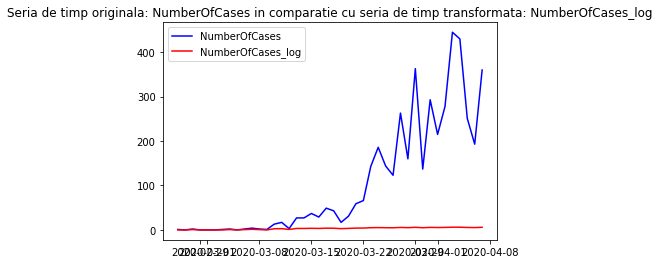

Verificarea stationaritatii pentru seria de timp logaritmata:
Testare folosind testul ADF:


Seria de timp este stationara dupa testarea ADF?:

Conform testului ADF seria de timp nu este stationara!

Test Statistic                 -0.761547
p-value                         0.830157
# Lags Used                     2.000000
Number of Observations Used    39.000000
Critical Value 1%              -3.610400
Critical Value 5%              -2.939109
Critical Value 10%             -2.608063
dtype: float64

Testare folosind testul KPSS:


Seria de timp este stationara dupa testarea KPSS?:

Conform testului KPSS seria de timp nu este stationara

Test Statistic          0.481087
p-value                 0.045926
# Lags Used            10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


In [53]:
#Transformarea seriei de timp pentru cazurile confirmate intr-o serie logaritmata
cases_per_day['NumberOfCases_log'] = [np.log(x) if x!=0 else 0 for x in cases_per_day['NumberOfCases'].values.tolist() ]
afisare_date_transformate(cases_per_day,'NumberOfCases','NumberOfCases_log')

print("Verificarea stationaritatii pentru seria de timp logaritmata:")
testare_stationaritate(cases_per_day,'NumberOfCases_log')

In [54]:
#Testarea stationaritatii pentru numarului de decese
testare_stationaritate(cases_per_day,'NumberOfFatalities')

Testare folosind testul ADF:


Seria de timp este stationara dupa testarea ADF?:

Conform testului ADF seria de timp este stationara!

Test Statistic                 -5.022989
p-value                         0.000020
# Lags Used                    10.000000
Number of Observations Used    31.000000
Critical Value 1%              -3.661429
Critical Value 5%              -2.960525
Critical Value 10%             -2.619319
dtype: float64

Testare folosind testul KPSS:


Seria de timp este stationara dupa testarea KPSS?:

Conform testului KPSS seria de timp este stationara

Test Statistic          0.414214
p-value                 0.071028
# Lags Used            10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


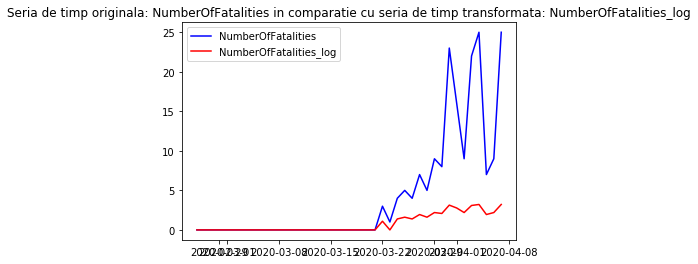

Verificarea stationaritatii pentru seria de timp logaritmata:
Testare folosind testul ADF:


Seria de timp este stationara dupa testarea ADF?:

Conform testului ADF seria de timp nu este stationara!

Test Statistic                 -1.644639
p-value                         0.459838
# Lags Used                     5.000000
Number of Observations Used    36.000000
Critical Value 1%              -3.626652
Critical Value 5%              -2.945951
Critical Value 10%             -2.611671
dtype: float64

Testare folosind testul KPSS:


Seria de timp este stationara dupa testarea KPSS?:

Conform testului KPSS seria de timp este stationara

Test Statistic          0.423241
p-value                 0.067138
# Lags Used            10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


In [55]:
cases_per_day['NumberOfFatalities_log'] = [np.log(x) if x!=0 else 0 for x in cases_per_day['NumberOfFatalities'].values.tolist() ]
afisare_date_transformate(cases_per_day,'NumberOfFatalities','NumberOfFatalities_log')

print("Verificarea stationaritatii pentru seria de timp logaritmata:")
testare_stationaritate(cases_per_day,'NumberOfFatalities_log')

In [56]:
cases_per_day.head()

,NumberOfCases,NumberOfFatalities,Weekday,NumberOfCases_log,NumberOfFatalities_log
Date,,,,,
2020-02-26,1,0,Wednesday,0.000000,0.0
2020-02-27,0,0,Thursday,0.000000,0.0
2020-02-28,2,0,Friday,0.693147,0.0
2020-02-29,0,0,Saturday,0.000000,0.0
2020-03-01,0,0,Sunday,0.000000,0.0


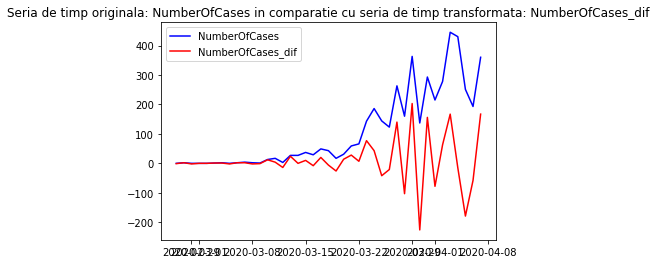

Verificarea stationaritatii pentru seria de timp diferentiata:
Testare folosind testul ADF:


Seria de timp este stationara dupa testarea ADF?:

Conform testului ADF seria de timp nu este stationara!

Test Statistic                 -1.075225
p-value                         0.724850
# Lags Used                    10.000000
Number of Observations Used    30.000000
Critical Value 1%              -3.669920
Critical Value 5%              -2.964071
Critical Value 10%             -2.621171
dtype: float64

Testare folosind testul KPSS:


Seria de timp este stationara dupa testarea KPSS?:

Conform testului KPSS seria de timp este stationara

Test Statistic          0.292648
p-value                 0.100000
# Lags Used            10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


In [57]:
#Diferentiere de gradul I
cases_per_day['NumberOfCases_dif'] = cases_per_day['NumberOfCases'] - cases_per_day['NumberOfCases'].shift()
cases_per_day = cases_per_day.dropna()
afisare_date_transformate(cases_per_day,'NumberOfCases','NumberOfCases_dif')

print("Verificarea stationaritatii pentru seria de timp diferentiata:")
testare_stationaritate(cases_per_day,'NumberOfCases_dif')

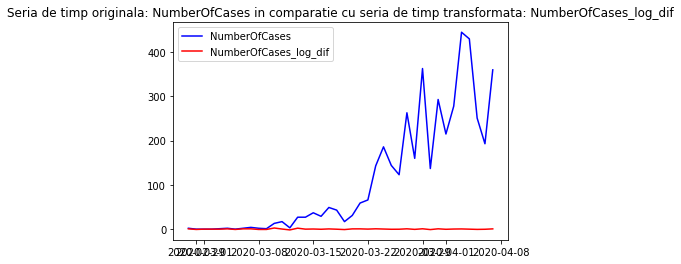

Verificarea stationaritatii pentru seria de timp diferentiata:
Testare folosind testul ADF:


Seria de timp este stationara dupa testarea ADF?:

Conform testului ADF seria de timp este stationara!

Test Statistic                -8.426198e+00
p-value                        1.923945e-13
# Lags Used                    1.000000e+00
Number of Observations Used    3.800000e+01
Critical Value 1%             -3.615509e+00
Critical Value 5%             -2.941262e+00
Critical Value 10%            -2.609200e+00
dtype: float64

Testare folosind testul KPSS:


Seria de timp este stationara dupa testarea KPSS?:

Conform testului KPSS seria de timp este stationara

Test Statistic          0.175969
p-value                 0.100000
# Lags Used            10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


In [58]:
cases_per_day['NumberOfCases_log_dif'] = cases_per_day['NumberOfCases_log'] - cases_per_day['NumberOfCases_log'].shift(1)
cases_per_day = cases_per_day.dropna()
afisare_date_transformate(cases_per_day,'NumberOfCases','NumberOfCases_log_dif')

print("Verificarea stationaritatii pentru seria de timp diferentiata:")
testare_stationaritate(cases_per_day,'NumberOfCases_log_dif')

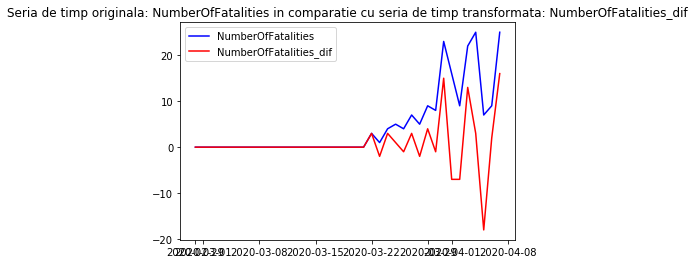

Verificarea stationaritatii pentru seria de timp diferentiata:
Testare folosind testul ADF:


Seria de timp este stationara dupa testarea ADF?:

Conform testului ADF seria de timp nu este stationara!

Test Statistic                 -0.126057
p-value                         0.946780
# Lags Used                    10.000000
Number of Observations Used    28.000000
Critical Value 1%              -3.688926
Critical Value 5%              -2.971989
Critical Value 10%             -2.625296
dtype: float64

Testare folosind testul KPSS:


Seria de timp este stationara dupa testarea KPSS?:

Conform testului KPSS seria de timp este stationara

Test Statistic          0.357798
p-value                 0.095346
# Lags Used            10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


In [59]:
#Diferentiere de gradul I
cases_per_day['NumberOfFatalities_dif'] = cases_per_day['NumberOfFatalities'] - cases_per_day['NumberOfFatalities'].shift()
cases_per_day = cases_per_day.dropna()
afisare_date_transformate(cases_per_day,'NumberOfFatalities','NumberOfFatalities_dif')

print("Verificarea stationaritatii pentru seria de timp diferentiata:")
testare_stationaritate(cases_per_day,'NumberOfFatalities_dif')

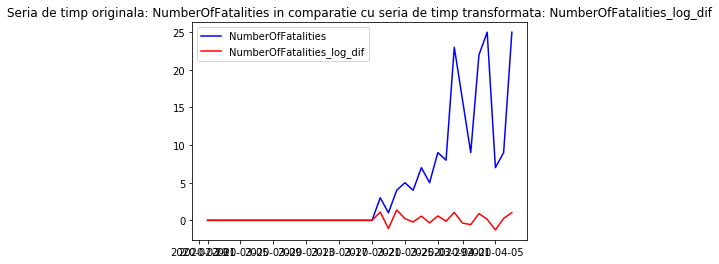

Verificarea stationaritatii pentru seria de timp diferentiata:
Testare folosind testul ADF:


Seria de timp este stationara dupa testarea ADF?:

Conform testului ADF seria de timp este stationara!

Test Statistic                -7.500184e+00
p-value                        4.273948e-11
# Lags Used                    1.000000e+00
Number of Observations Used    3.600000e+01
Critical Value 1%             -3.626652e+00
Critical Value 5%             -2.945951e+00
Critical Value 10%            -2.611671e+00
dtype: float64

Testare folosind testul KPSS:


Seria de timp este stationara dupa testarea KPSS?:

Conform testului KPSS seria de timp este stationara

Test Statistic          0.264649
p-value                 0.100000
# Lags Used            10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


In [60]:
cases_per_day['NumberOfFatalities_log_dif'] = cases_per_day['NumberOfFatalities_log'] - cases_per_day['NumberOfFatalities_log'].shift(1)
cases_per_day = cases_per_day.dropna()
afisare_date_transformate(cases_per_day,'NumberOfFatalities','NumberOfFatalities_log_dif')

print("Verificarea stationaritatii pentru seria de timp diferentiata:")
testare_stationaritate(cases_per_day,'NumberOfFatalities_log_dif')

# Realizarea modelului ARIMA walk-forward pentru setul de date cu numarul de cazuri confirmate

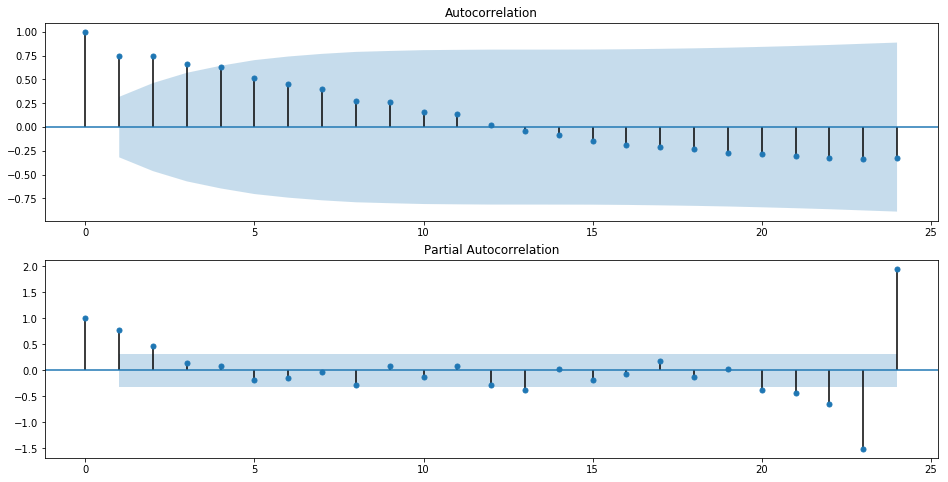

In [61]:
#Indetificarea functiei de autocorelare si autocorelare partiala pentru numarul de cazuri confirmate
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
f,(ax1,ax2) = plt.subplots(2,1,figsize=(16,8))
#Graficul ACF
plot_acf(cases_per_day['NumberOfCases'],lags=24,ax=ax1)
#Graficul PACF
plot_pacf(cases_per_day['NumberOfCases'],lags=24,ax=ax2)

plt.show()
plt.close()

In [62]:
#Crearea functiei de calcularea a MSLE
def mean_squared_logarithmic_error(y_test,y_pred):
    return np.mean(np.square(np.log([y-1 for y in y_test])-np.log([y-1 for y in y_pred])))

In [63]:
#Crearea functiei pentru identificarea celor mai bune configuratii ARIMA sortate dupa AIC sau MSLE
def best_model_ARIMA(train,test,ts,p_values,d_values,q_values,steps):
    aicVal = []
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train[ts],order = (p,d,q))
                    model_fit = model.fit()
                    forecast = model_fit.forecast(steps=steps)[0]
                    
                    msle = mean_squared_logarithmic_error(test[ts].values.tolist(),forecast)
                    aicVal.append([p,d,q,model_fit.aic,msle])
                except:
                    pass   
                
    frame = pd.DataFrame(aicVal,columns=['p','d','q','AIC','MSLE'])
    frame = frame.sort_values(by='MSLE')
    return frame    

In [64]:
#Separarea setului de date in 75% train si 25% test
test_size = int(len(cases_per_day)*0.25) 
train = cases_per_day.iloc[:-test_size]
test = cases_per_day.iloc[-test_size:]

In [65]:
#Identificarea valorilor pentru p,d,q si sortarea acestora
from statsmodels.tsa.arima_model import ARIMA
p_values=[0,1,2,3,4,5]
d_values=[0,1]
q_values =[0,1,2,3,4,5]
days_to_predict = len(test)
best_models = best_model_ARIMA(train,test,'NumberOfCases',p_values,d_values,q_values,days_to_predict)

In [66]:
best_models.head(15)

,p,d,q,AIC,MSLE
16,4,0,0,315.170926,0.106819
8,0,1,4,298.725551,0.114270
12,2,0,0,313.229697,0.114547
11,1,1,0,294.089842,0.116803
13,2,1,0,295.994325,0.122359
15,3,1,0,297.859190,0.126949
17,5,1,0,301.821690,0.133749
7,0,1,3,295.958699,0.146633
5,0,1,1,300.432730,0.155048
9,0,1,5,295.568479,0.186307


In [67]:
#Crearea functiei pentru vizualizarea predictiei in paralel cu setul de test
def reprezentare_predictie(test,ts,forecast,index,title):
    msle = mean_squared_logarithmic_error(test,forecast)
    forecast = pd.DataFrame(forecast,columns=[ts],index=index)
    test = pd.DataFrame(test,columns=[ts],index=index)
    
    f,ax = plt.subplots(figsize=(10,5))
    test[ts].plot(ax=ax,color='blue',label='Original')
    forecast[ts].plot(ax=ax,color='red',label='Predicted',linestyle='dashed')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Cases')
    plt.title(f'MSLE: {msle} pentru setul de test: {title}')
    plt.show()
    plt.close()

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
def reprezentare_cumulata(dataset,ts,forecast,dates,titlu):
    
    forecast[0] = dataset[ts].values.tolist()[len(dataset)-1]
    sum_of_cases =  [sum(forecast[0:x]) for x in range(1,len(forecast)+1)]
    
    final_forecast = pd.DataFrame(sum_of_cases,columns=['Forecast'],index=dates)
    
    f,ax = plt.subplots(figsize=(10,5))
    dataset[ts].plot(ax=ax,color='blue',label='Original')
    final_forecast['Forecast'].plot(ax=ax,color='red',label='Forecast',linestyle='--')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Cases')
    plt.title(f'{titlu}')
    plt.show()
    plt.close()

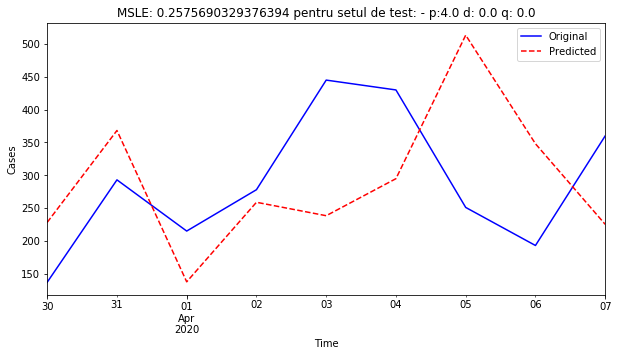

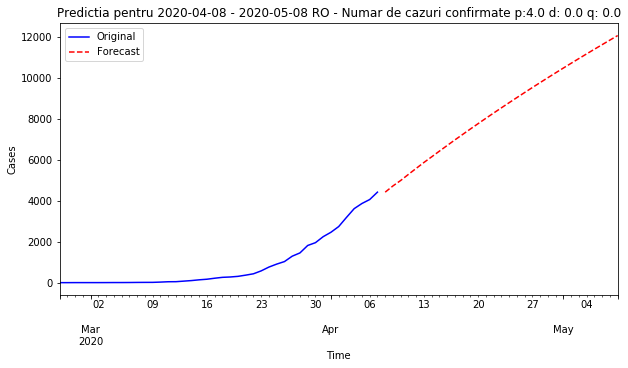

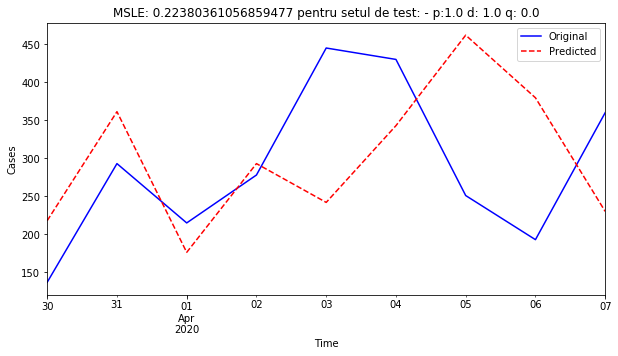

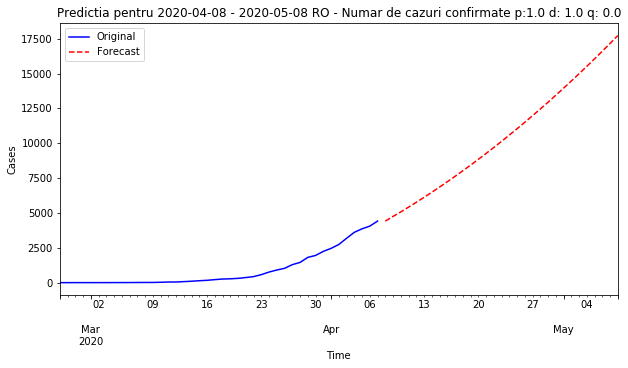

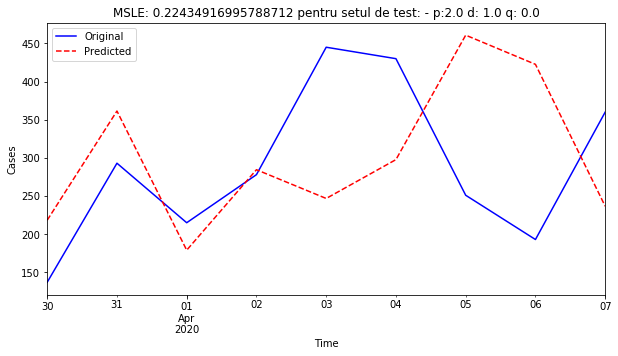

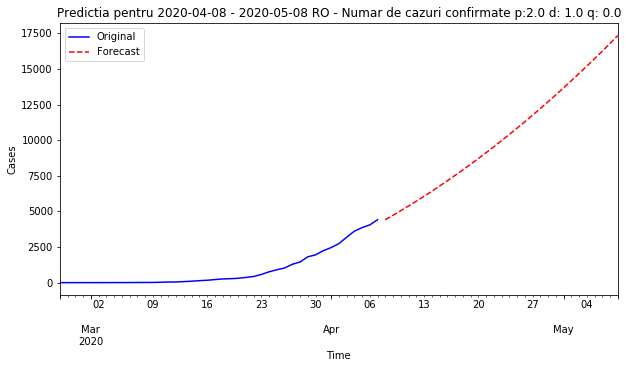

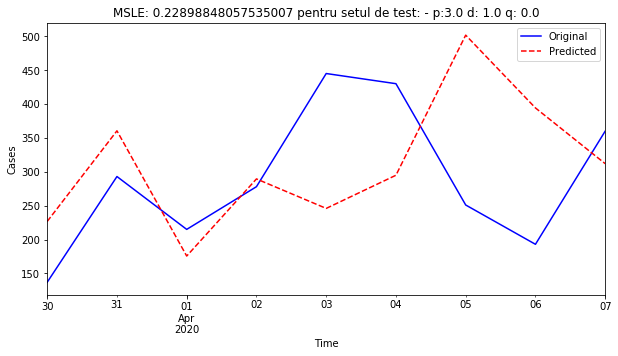

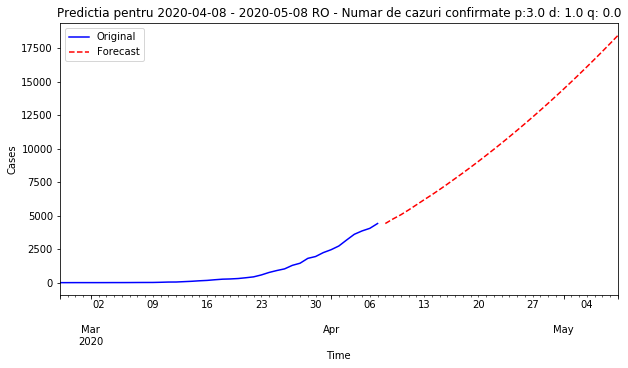

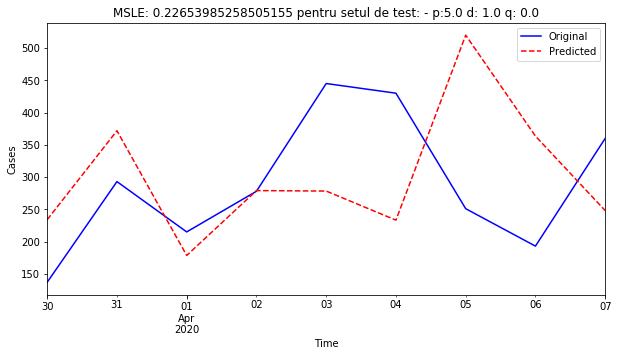

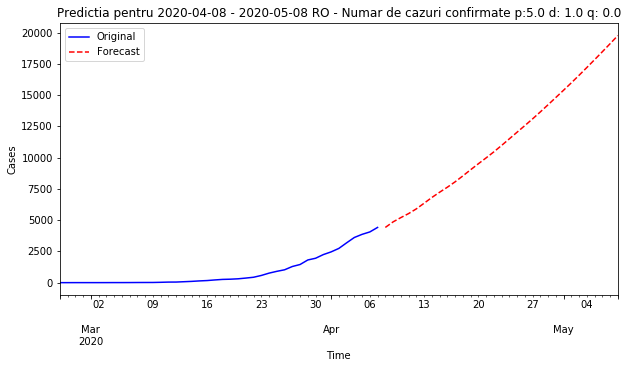

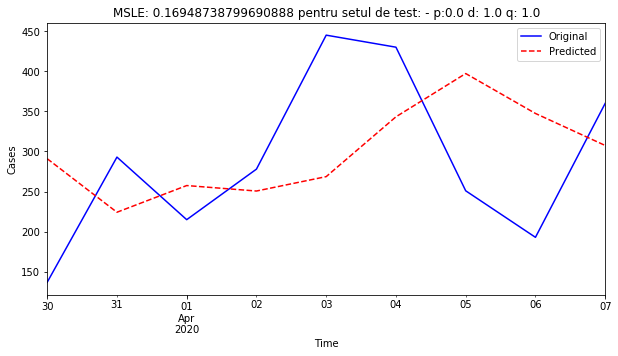

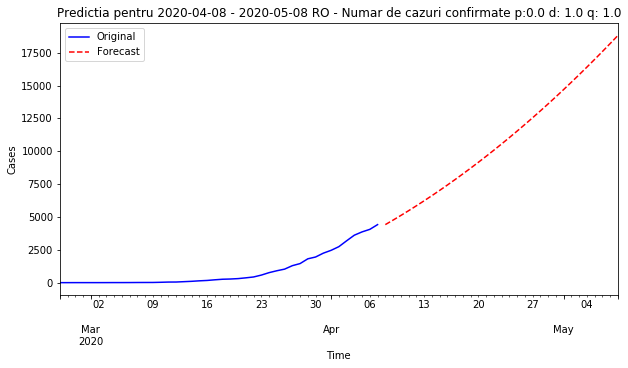

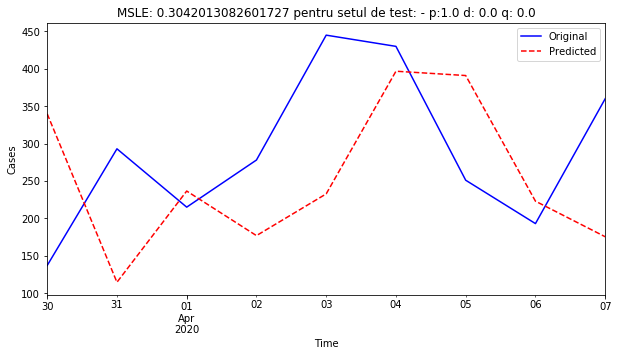

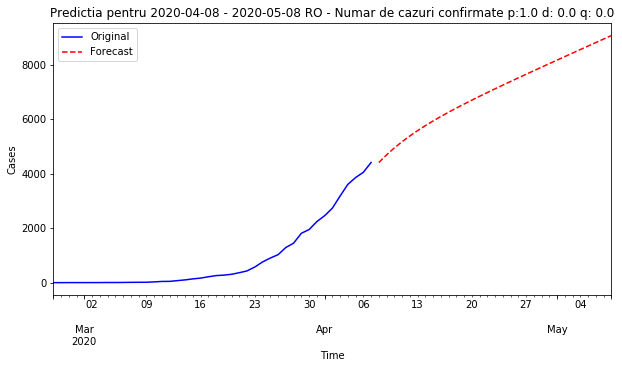

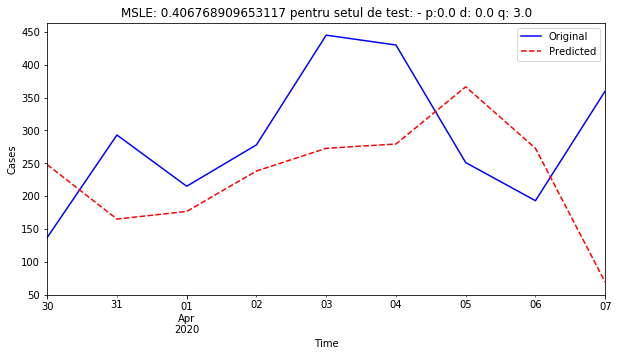

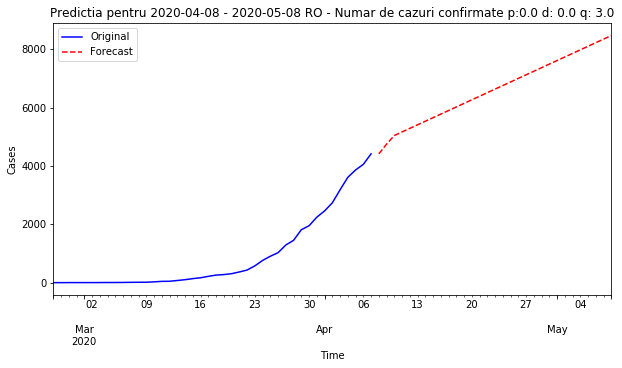

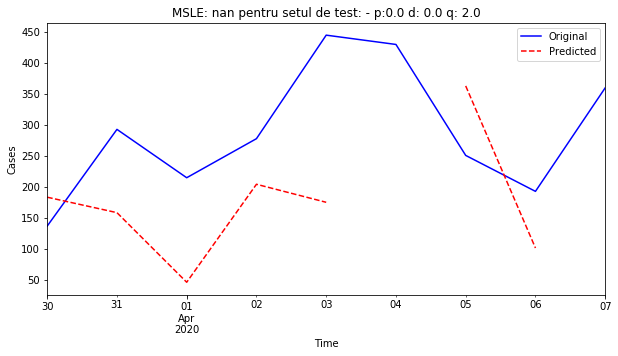

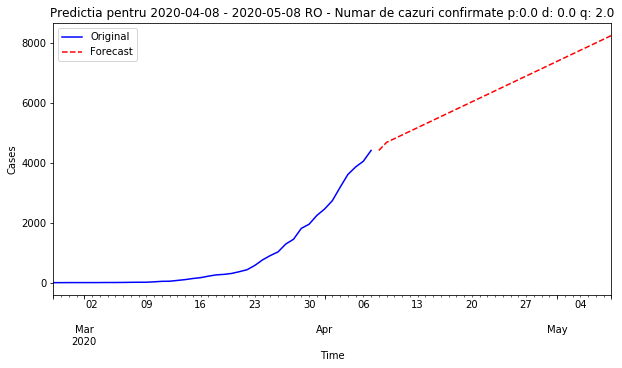

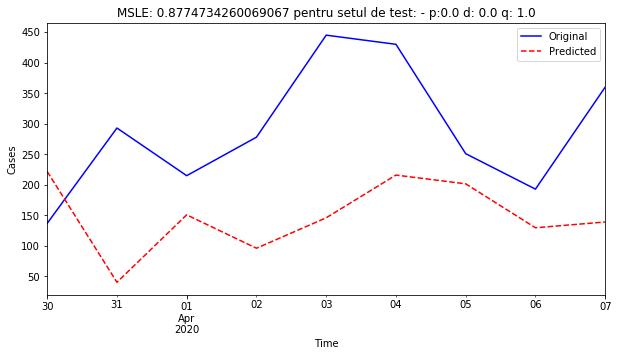

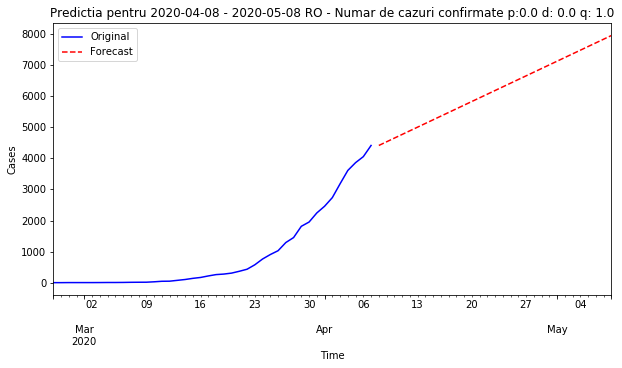

In [69]:
#Crearea listei de date pentru luna viitoare
time_to_start = '2020-04-08'
time_to_stop = '2020-05-08'
dates = pd.date_range(time_to_start,time_to_stop).tolist()

#Prelucrarea fiecarei configuratii p,d,q
#Se utilizeaza metoda de walk-forward
for i,row in enumerate(best_models.values):
    #Pornirea se face de la setul complet de train
    history = [x for x in train['NumberOfCases']]
    prediction = []
    try:
        #Pentru fiecare valoarea din test se va crea modelul ARIMA
        for t in range(0,len(test)):
            model = ARIMA(history,order = (int(row[0]),int(row[1]),int(row[2])))
            model_fit = model.fit()

            forecast = model_fit.forecast()
            #Se memoreaza predictia pentru timpul curent t
            prediction.append(forecast[0])
            #Se memoreaza in istoria datelor valoarea curenta din test pentru a putea 
            #antrena modelul ARIMA cu aceasta
            history.append(test['NumberOfCases'][t])
        
        #Reprezentarea predictiei in concordanta cu setul de test
        reprezentare_predictie(list(test['NumberOfCases'].values),'NumberOfCases',list(prediction),test.index,f'- p:{row[0]} d: {row[1]} q: {row[2]}')
        
        #Crearea predictiei pentru perioada 2020-04-08 - 2020-05-08
        model = ARIMA(history,order = (int(row[0]),int(row[1]),int(row[2])))
        model_fit = model.fit()
        
        #Identificarea predictiei, eroarea standard si intervalul de incredere
        forecast, stderr, conf = model_fit.forecast(len(dates))
        
        title = f'Predictia pentru 2020-04-08 - 2020-05-08 RO - Numar de cazuri confirmate p:{row[0]} d: {row[1]} q: {row[2]}'
        
        reprezentare_cumulata(df_cumulat,'ConfirmedCases',forecast,dates,title)
        

    except:
        pass

# Realizarea modelului ARIMA walk-forward pentru setul de date cu numarul de decese logaritmate

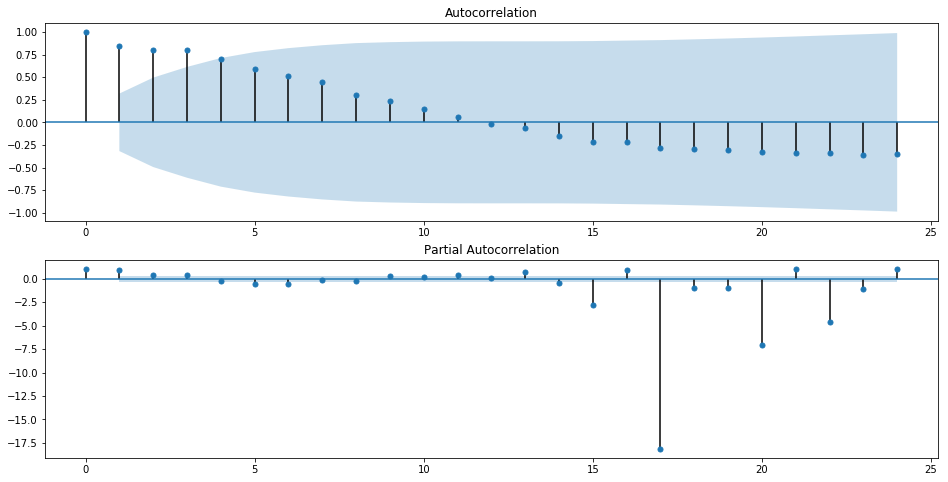

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
f,(ax1,ax2) = plt.subplots(2,1,figsize=(16,8))
#Graficul ACF
plot_acf(cases_per_day['NumberOfFatalities_log'],lags=24,ax=ax1)
#Graficul PACF
plot_pacf(cases_per_day['NumberOfFatalities_log'],lags=24,ax=ax2)

plt.show()
plt.close()

In [71]:
from statsmodels.tsa.arima_model import ARIMA
p_values=[0,1,2,3,4,5]
d_values=[0,1,2]
q_values =[0,1,2,3,4,5]
days_to_predict = len(test)
best_models = best_model_ARIMA(train,test,'NumberOfFatalities_log',p_values,d_values,q_values,days_to_predict)

In [72]:
best_models.head(15)

,p,d,q,AIC,MSLE
6,0,1,0,35.417027,0.118760
41,4,1,0,21.767518,0.122902
29,3,1,0,20.861088,0.123501
42,4,1,1,23.424559,0.124220
30,3,1,1,21.549150,0.124711
51,5,1,0,22.629585,0.127993
52,5,1,1,23.981592,0.134902
7,0,1,1,27.926393,0.141566
13,1,1,0,23.440137,0.141611
14,1,1,1,25.016654,0.143544


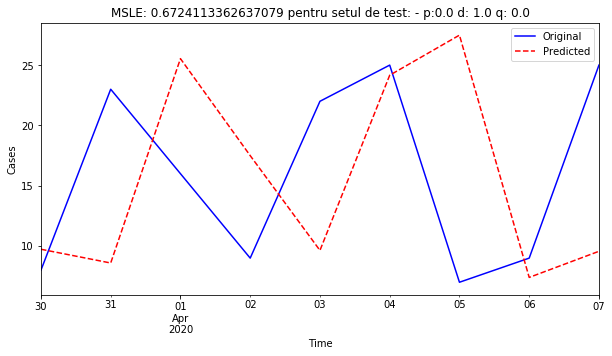

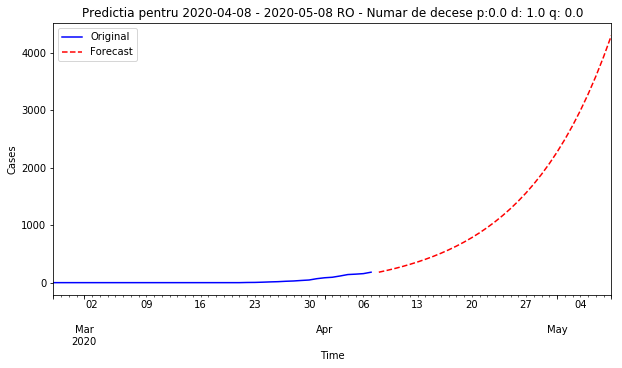

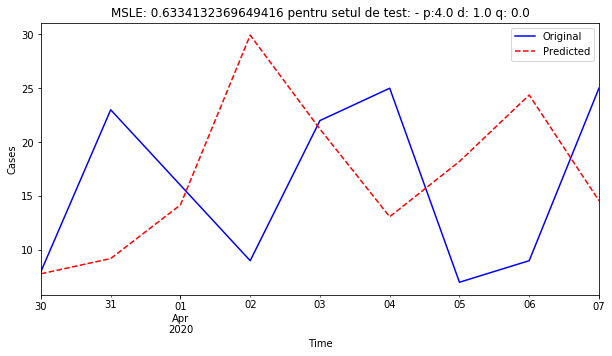

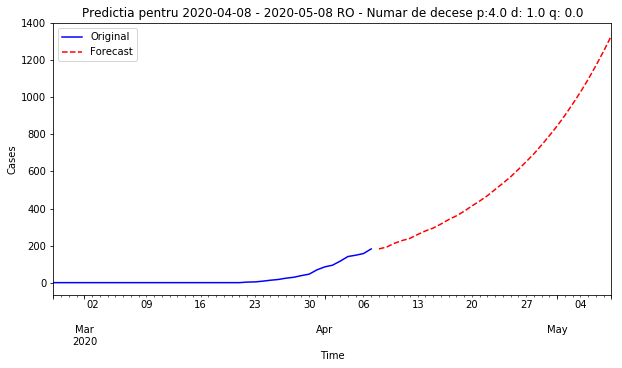

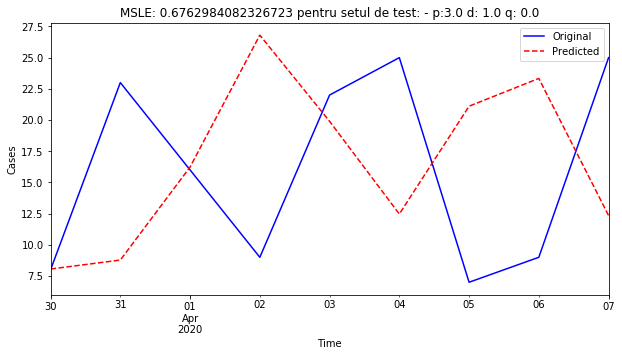

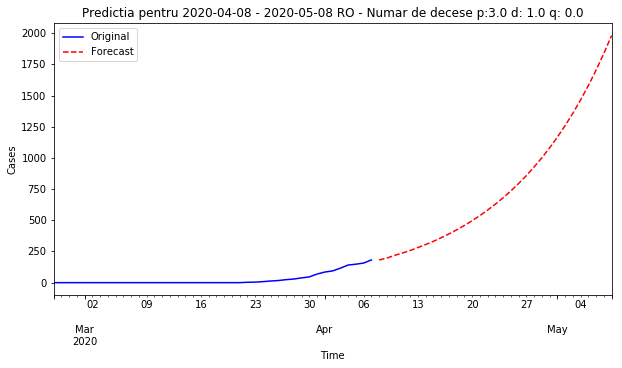

In [73]:
time_to_start = '2020-04-08'
time_to_stop = '2020-05-08'
dates = pd.date_range(time_to_start,time_to_stop).tolist()

for i,row in enumerate(best_models.values[0:5]):
    history = [x for x in train['NumberOfFatalities_log']]
    prediction = []
    try:
        for t in range(0,len(test)):
            model = ARIMA(history,order = (int(row[0]),int(row[1]),int(row[2])))
            model_fit = model.fit()

            forecast = model_fit.forecast()[0]
            prediction.append(forecast[0])
            history.append(test['NumberOfFatalities_log'][t])
        
        reprezentare_predictie(list(test['NumberOfFatalities'].values),'NumberOfFatalities_log',list(np.exp(prediction)),test.index,f'- p:{row[0]} d: {row[1]} q: {row[2]}')
        
        model = ARIMA(history,order = (int(row[0]),int(row[1]),int(row[2])))
        model_fit = model.fit()

        forecast, stderr, conf = model_fit.forecast(len(dates))
        
        title = f'Predictia pentru 2020-04-08 - 2020-05-08 RO - Numar de decese p:{row[0]} d: {row[1]} q: {row[2]}'
        reprezentare_cumulata(df_cumulat,'Fatalities',list(np.exp(forecast)),dates,title)
        
    except:
        pass